<a href="https://colab.research.google.com/github/thessafuzaro/Trabalho_Imagens/blob/main/Recycle_018_Cassificacao_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split

In [145]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [146]:
#clonando os arquivos 
!git clone https://github.com/thessafuzaro/Trabalho_Imagens
%cd Trabalho_Imagens

Cloning into 'Trabalho_Imagens'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (64/64), done.
/content/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens/Trabalho_Imagens


In [147]:
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

In [148]:
# all images are load in variable x...
Arq =['Daisy.zip','Dandelion.zip','Rose.zip','Not_Flower.zip']

img_name=[]
x_gray=[]  
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)

In [149]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [150]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [151]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [152]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 80
num_range = DATASET_SIZE

In [153]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [154]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [155]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name),(Img_Size,Img_Size)))
  Y_test.append(y[II])

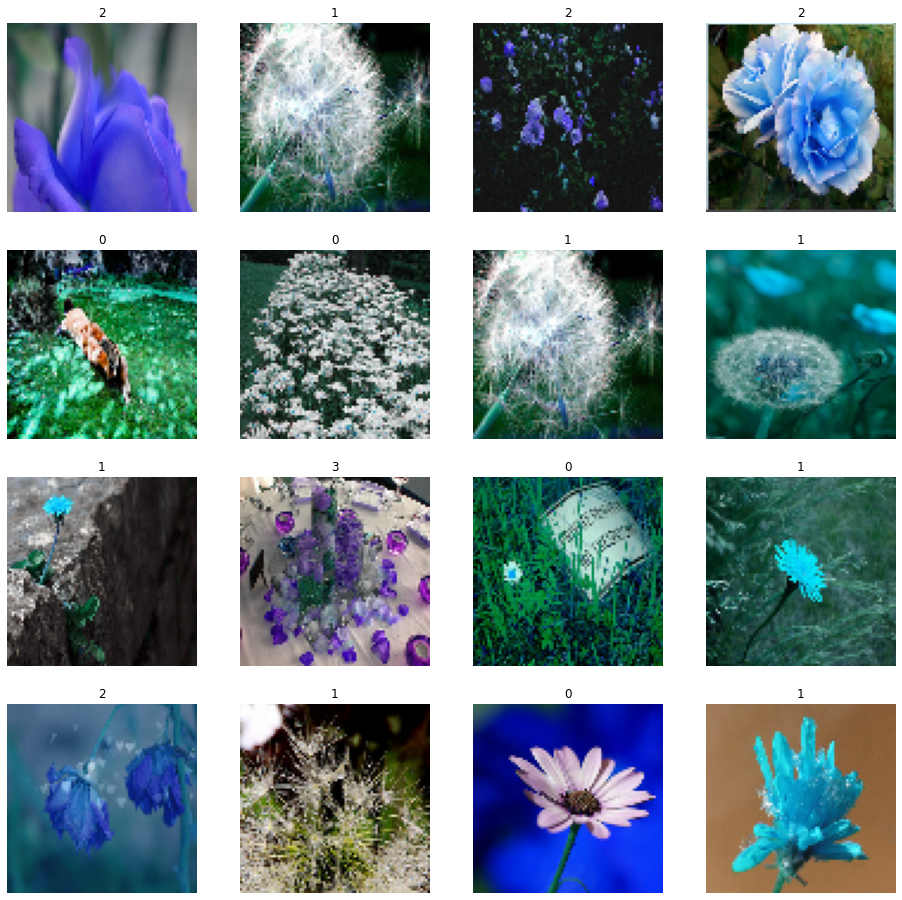

In [156]:
# Imagens de treino em que aparece o numero relacionado ao tipo de flor (0=daisy; 1=dandelion; 2=rose; 3= not_flower)
num,cols,dim = np.array(X_train[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))  
  plt.imshow(X_train[kk])
  plt.title(Y_train[kk])
  plt.axis("off")

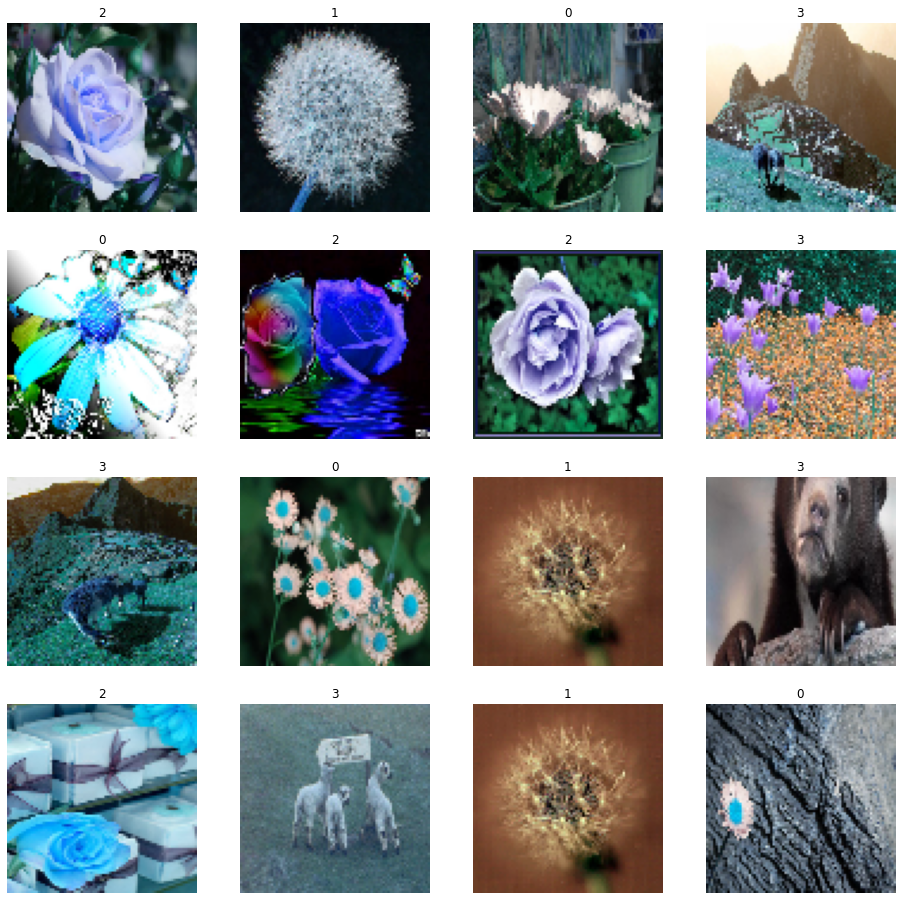

In [157]:
# Imagens de teste
num,cols,dim = np.array(X_test[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  plt.imshow(X_test[kk])
  plt.title(Y_test[kk])
  plt.axis("off")

In [158]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))
X_train = X_train.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_train = Y_train.astype(np.int32)
#Y_train = Y_train.reshape(1,-1)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 3) / 255.0
Y_test = Y_test.astype(np.int32)
#Y_test = Y_test.reshape(1,-1)
Y_test = ynindicator(Y_test)

In [159]:

# the model will be a sequence of layers

model = Sequential()


# make the CNN
# model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 3), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [160]:
# gives us back a <keras.callbacks.History object at 0x112e61a90>
r = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=15, batch_size=32)
print("Returned:", r)

Epoch 1/15
39/39 [==============================] - 3s 30ms/step - loss: 3.3309 - accuracy: 0.3834 - val_loss: 1.1933 - val_accuracy: 0.5422
Epoch 2/15
39/39 [==============================] - 1s 14ms/step - loss: 1.0552 - accuracy: 0.5543 - val_loss: 1.2460 - val_accuracy: 0.4221
Epoch 3/15
39/39 [==============================] - 1s 15ms/step - loss: 0.9618 - accuracy: 0.6249 - val_loss: 1.3056 - val_accuracy: 0.4383
Epoch 4/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8951 - accuracy: 0.6481 - val_loss: 1.3291 - val_accuracy: 0.3052
Epoch 5/15
39/39 [==============================] - 1s 14ms/step - loss: 0.8186 - accuracy: 0.6715 - val_loss: 1.2588 - val_accuracy: 0.3636
Epoch 6/15
39/39 [==============================] - 1s 14ms/step - loss: 0.7185 - accuracy: 0.7190 - val_loss: 1.3231 - val_accuracy: 0.3929
Epoch 7/15
39/39 [==============================] - 1s 14ms/step - loss: 0.7231 - accuracy: 0.7230 - val_loss: 1.2831 - val_accuracy: 0.4481
Epoch 8/15
39

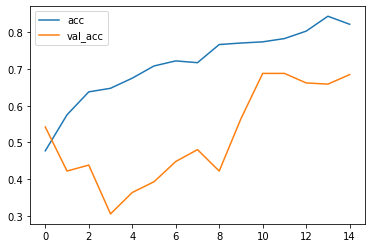

In [161]:
# plot some data
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

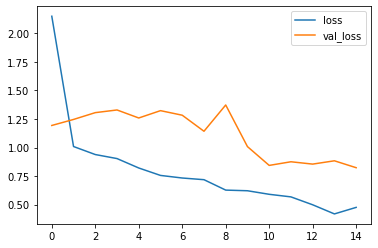

In [162]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()